<a href="https://colab.research.google.com/github/smart-sangmin/self_learning_machine_learning_and_deep_learning/blob/main/8%EC%9E%A5-2%20%ED%95%A9%EC%84%B1%EA%B3%B1%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow.keras.datasets import fashion_mnist
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

In [16]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

In [17]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42, ) 

In [21]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

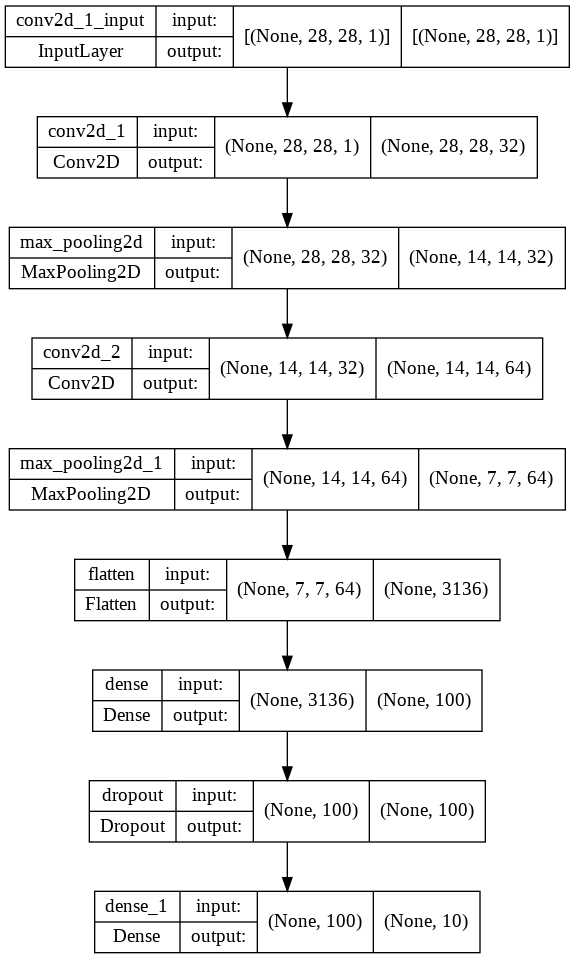

In [23]:
keras.utils.plot_model(model, show_shapes=True)

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 100s 66ms/step - loss: 0.5434 - accuracy: 0.8040 - val_loss: 0.3365 - val_accuracy: 0.8758
Epoch 2/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.3644 - accuracy: 0.8694 - val_loss: 0.2806 - val_accuracy: 0.8942
Epoch 3/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3099 - accuracy: 0.8881 - val_loss: 0.2634 - val_accuracy: 0.8991
Epoch 4/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2801 - accuracy: 0.9000 - val_loss: 0.2479 - val_accuracy: 0.9050
Epoch 5/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2546 - accuracy: 0.9070 - val_loss: 0.2416 - val_accuracy: 0.9097
Epoch 6/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2347 - accuracy: 0.9140 - val_loss: 0.2323 - val_accuracy: 0.9160
Epoch 7/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2158 - accuracy: 0.9204 - val_loss: 0.2263 

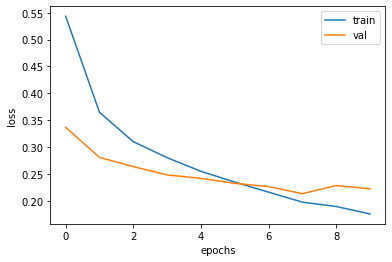

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 19ms/step - loss: 0.2130 - accuracy: 0.9233


[0.213028222322464, 0.9233333468437195]

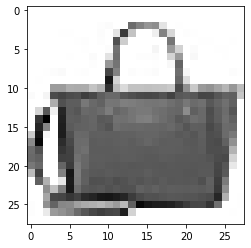

In [27]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [29]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.24866073e-17 2.35977720e-28 7.03082066e-20 3.44596942e-23
  3.51959979e-21 1.44344822e-15 4.58680490e-19 1.00953025e-19
  1.00000000e+00 2.59065148e-20]]


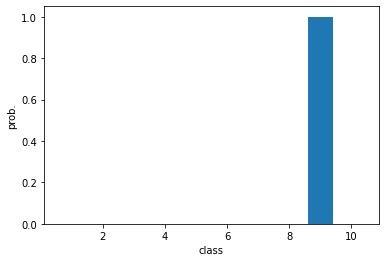

In [30]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [31]:
classes = ['티', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [32]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [33]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 8s 24ms/step - loss: 0.2365 - accuracy: 0.9157


[0.23654350638389587, 0.9157000184059143]